## Problem 13 (page 41)
Construct a difference method for the the numerical approximation of the solution of the following boundary value problem:Find $u:[a,b]\to \mathbb{R}$ function,such that $$ -u''(x)=f(x)$$ and $u(a)=0, u(b)=0$ using a non-uniform grid of the form : 

\begin{align*} 
x_{0} =& a \\
x_{1} =& x_{0} +h_{1} \\
x_{2} =& x_{1} + h_{2} \\ 
\vdots \\
x_{N} =& x_{N-1} + h_{N}\\
x_{N+1} =&  b 
\end{align*}
 
where : 
$$h_{i} = x_{i} - x_{i-1}$$ 

for all 
$$i = 1,\dots,N + 1.$$

Write the resulting linear system. 


Hint: Start by constructing the 2nd divided difference on a non-uniform grid.

### Solution 

$$h_{i} = x_{i} - x_{i-1}$$  and from that 
$$h_{i+1} = x_{i+1} - x_{i}$$ 
writing the Taylor series at $x_{i}$:

$$\begin{equation}
u(x) = u(x_{i}) + (x_{i} - x_{i-1}) u'(x_{i}) + \frac{(x_{i} - x_{i-1})^{2}}{2!}  u''(x_{i}) +  \frac{(x_{i} - x_{i-1})^{3}}{3!}  u'''(x_{i}) + \dots + \frac{(x_{i} - x_{i-1})^{n}}{n!} u^{n}(x_{i})
\end{equation}  $$

Using again Taylor's Theorem, and evaluating $u(x)$ at $x_{i+1}$ and $x_{i-1}$ we obtain the below two series :  

$$u(x_{i+1}) = u(x_{i}) + h_{i+1} u'(x_{i}) + \frac{h^{2}_{i+1}}{2!}  u''(x_{i}) +  \frac{h^{3}_{i+1}}{3!}  u'''(x_{i}) + \dots + \frac{h_{i+1}^{n}}{n!} u^{n}(x_{i})$$

$$u(x_{i-1}) = u(x_{i}) - h_{i} u'(x_{i}) + \frac{h^{2}_{i}}{2!}  u''(x_{i}) -  \frac{h^{3}_{i}}{3!}  u'''(x_{i}) + \dots+ \frac{-h_{i}^{n}}{n!} u^{n}(x_{i})$$

Solving for $u''(x)$ we take :  




$$\begin{align*}
    u''(x) =& \frac{ 2 \left[ u(x_{i+1}) + \frac{h_{i+1}}{h_{i}} u(x_{i-1}) -\left(1+  \frac{h_{i+1}}          {h_{i}}\right)u(x_{i}) \right]  }{h_{i+1}h_{i}\left(1+ \frac{h_{i+1}}{h_{i}} \right) } \\
    =& \frac{ 2 \left[ h_{i}(u(x_{i+1})-u(x_{i})) - h_{i+1}(u(x_{i-1})-u(x_{i})) \right] }{h_{i+1}(h_{i}+h_{i+1}) }  \\
    =&\dfrac{-2 h_{i} (u(x_{i+1}) - u(x_{i})) - h_{i + 1} (u(x_{i-1}) - u(x_{i}))}{h_{i + 1} (h_{i} + h_{i + 1})} \\
    =&\dfrac{ 2 h_{i} (u(x_{i + 1}) - u(x_{i}))}{h_{i + 1} (h_{i} + h_{i + 1})} - \dfrac{2 (u(x_{i - 1}) - u(x_{i}))}{h_{i} + h_{i + 1}}
\end{align*}$$

## Example 4.1 (page 46)
We want to approximate the solution of the initial boundary value problem above using the explicit Euler method when $a=0,b=1$ and 
 $$u_{0}(x) = \begin{cases} 
      2x &  0 \leq x \leq  1/2 \\
      2-2x &  1/2 < x \leq 1
   \end{cases} $$


In [1]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


Nx = 19  # GRID POINTS on space interval
Nt = 800 # GRID POINTS on time interval

a = 0
b = 1

# ----- Spatial discretization step -----
dx = (b - a)/(Nx - 1)

t0 = 0
Tf = 1

# ----- Time step -----
dt = (Tf - t0)/(Nt - 1)



h = (b-a)/(Nx+1)

t = Tf / Nt

m = t/h**2


print("m =", m)

# ----- Creates grids -----
xspan = np.linspace(a, b, Nx)
tspan = np.linspace(t0, Tf, Nt)

# ----- Initializes matrix solution U -----
U1 = np.zeros((Nx, Nt))

# ----- Initial condition -----
U1[:,0] = np.where((xspan>=0) & (xspan<=1/2),2*xspan,2-2*xspan)

# ----- Dirichlet Boundary Conditions -----
U1[0,:] = 0.0
U1[-1,:] = 0.0


for k in range(0, Nt-1):
    for i in range(1, Nx-1):
        U1[i, k+1] = m*U1[i-1, k] + (1-2*m)*U1[i,k] + m*U1[i+1,k] 

X1, T1 = np.meshgrid(tspan, xspan)



m = 0.4999999999999999


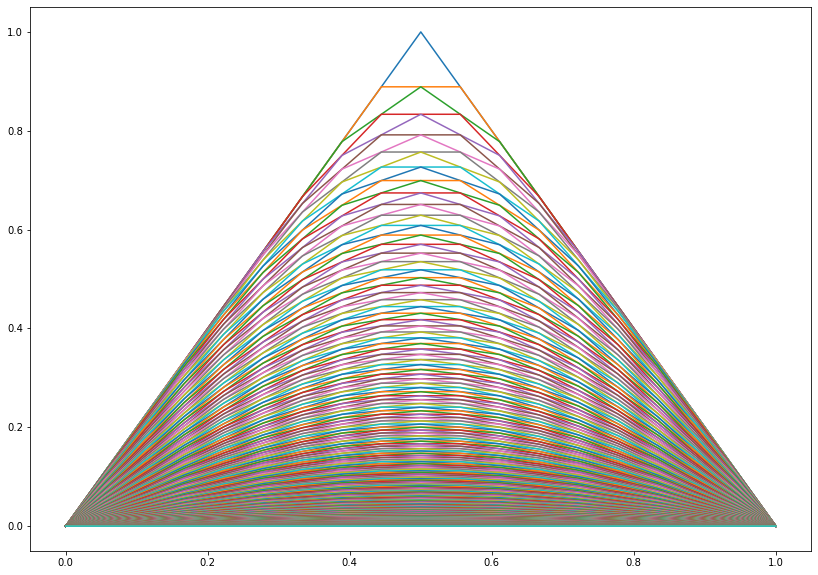

In [2]:
plt.figure(figsize=(14,10))
plt.plot(T1,U1)
plt.show()

In [3]:

Nx = 19  # GRID POINTS on space interval
Nt = 770 # GRID POINTS on time interval

a = 0
b = 1

# ----- Spatial discretization step -----
dx = (b - a)/(Nx - 1)

t0 = 0
Tf = 1

# ----- Time step -----
dt = (Tf - t0)/(Nt - 1)



h = (b-a)/(Nx+1)

t = Tf / Nt

m = t/h**2


print("m =", m)

# ----- Creates grids -----
xspan = np.linspace(a, b, Nx)
tspan = np.linspace(t0, Tf, Nt)

# ----- Initializes matrix solution U -----
U2 = np.zeros((Nx, Nt))

# ----- Initial condition -----
U2[:,0] = np.where((xspan>=0) & (xspan<=1/2),2*xspan,2-2*xspan)

# ----- Dirichlet Boundary Conditions -----
U2[0,:] = 0.0
U2[-1,:] = 0.0


for k in range(0, Nt-1):
    for i in range(1, Nx-1):
        U2[i, k+1] = m*U2[i-1, k] + (1-2*m)*U2[i,k] + m*U2[i+1,k] 

X2, T2 = np.meshgrid(tspan, xspan)



m = 0.5194805194805194


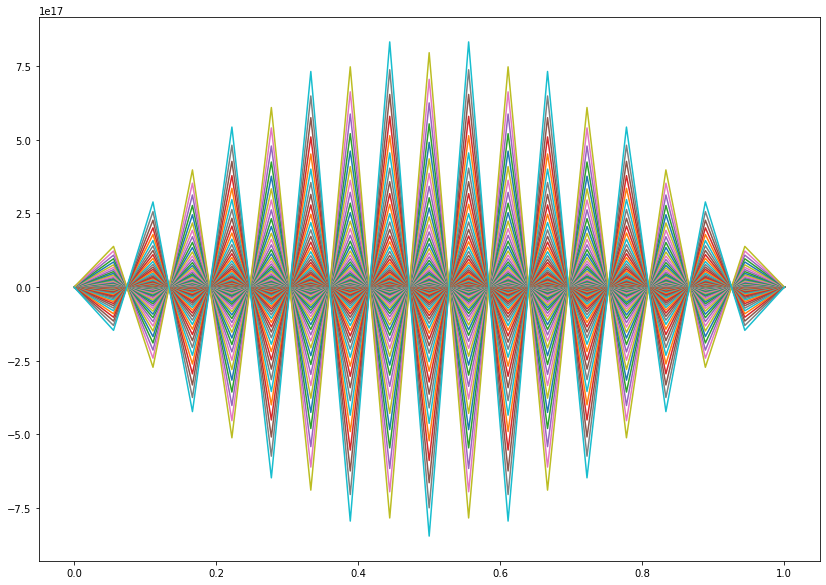

In [4]:
plt.figure(figsize=(14,10))
plt.plot(T2,U2)
plt.show()

# Truncation errors 

## Problem 19 (page 53)


Our function is : 
$$u_{t}(t_{n},x_{i})-u_{xx}(t_{n},x_{i}) = 0 $$


The error function of the implicit method now is:


$$T_{i}^{n}:=  \frac{u(t_{n},x_{i}) -u(t_{n-1},x_{i})  }{\tau} -  \frac{ u(t_{n},x_{i+1}) -2u(t_{n},x_{i}) +u(t_{n},x_{i-1})  }{h^{2}}$$

So we have to use Taylor’s expansion for $u(t_{n-1},x_{i})$, $u(t_{n},x_{i+1})$ and $u(t_{n},x_{i+1})$,and doing so  we obtain the following 3 expansions:

$$u(t_{n-1},x_{i}) =  u(t_{n},x_{i}) - \tau u_{t}(t_{n},x_{i}) + \frac{\tau^{2}}{2!} u_{tt}(t_{n},x_{i}) - \frac{\tau^{3}}{3!} u_{ttt}(t_{n},x_{i}) + \frac{\tau^{4}}{4!} u_{tttt}(t_{n},x_{i})     $$


$$u(t_{n},x_{i+1}) =  u(t_{n},x_{i}) + h u_{x}(t_{n},x_{i}) + \frac{h^{2}}{2!} u_{xx}(t_{n},x_{i}) + \frac{h^{3}}{3!} u_{xxx}(t_{n},x_{i}) + \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i}) $$

$$+ \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i})  + \frac{h^{5}}{5!} u_{xxxx}(t_{n},x_{i}) + \frac{h^{6}}{6!} u_{xxxx}(t_{n},x_{i})    $$

$$u(t_{n},x_{i-1}) =  u(t_{n},x_{i}) - h u_{x}(t_{n},x_{i}) + \frac{h^{2}}{2!} u_{xx}(t_{n},x_{i}) - \frac{h^{3}}{3!} u_{xxx}(t_{n},x_{i}) + \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i})     $$
$$+ \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i})  - \frac{h^{5}}{5!} u_{xxxx}(t_{n},x_{i}) + \frac{h^{6}}{6!} u_{xxxx}(t_{n},x_{i})    $$



Substituting these 3 equations in $T_{i}^{n}$ we get : 

$$T_{i}^{n}:= \frac{u(t_{n},x_{i}) -u(t_{n},x_{i}) - \tau u_{t}(t_{n},x_{i}) + \frac{\tau^{2}}{2!} u_{tt}(t_{n},x_{i}) - \frac{\tau^{3}}{3!} u_{ttt}(t_{n},x_{i}) + \frac{\tau^{4}}{4!} u_{tttt}(t_{n},x_{i})   }{\tau}$$ 

$$- \frac{ \left[ u(x_{n},x_{i}) + h u_{x}(t_{n},x_{i}) + \frac{h^{2}}{2!} u_{xx}(t_{n},x_{i}) + \frac{h^{3}}{3!} u_{xxx}(t_{n},x_{i}) + \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i}) + \frac{h^{5}}{5!} u_{xxxx}(t_{n},x_{i}) + \frac{h^{6}}{6!} u_{xxxx}(t_{n},x_{i}) \right]}{h^{2}} -$$


$$\frac{2u(t_{n},x_{i})+ \left[ u(t_{n},x_{i}) - h u_{x}(t_{n},x_{i}) + \frac{h^{2}}{2!} u_{xx}(t_{n},x_{i}) - \frac{h^{3}}{3!} u_{xxx}(t_{n},x_{i}) + \frac{h^{4}}{4!} u_{xxxx}(t_{n},x_{i})  - \frac{h^{5}}{5!} u_{xxxx}(t_{n},x_{i}) + \frac{h^{6}}{6!} u_{xxxx}(t_{n},x_{i}) \right] }{h^{2}}  $$

$$T_{i}^{n}:= u_{t}(t_{n},x_{i}) + \frac{\tau}{2} u_{tt}(t_{n},x_{i}) - \frac{\tau^{2}}{6} u_{ttt}(t_{n},x_{i})  -  \frac{h^{2}}{12} u_{xx}(t_{n},x_{i})  -\frac{h^{4}}{360} u_{xxxxxx}(t_{n},x_{i})  $$

$$T_{i}^{n} = u_{t}(t_{n},x_{i})-u_{xx}(t_{n},x_{i})  + \underbrace{ \frac{\tau}{2} u_{tt}(t_{n},x_{i}) - \frac{h^{2}}{12} u_{xxxx}(t_{n},x_{i})}_{residual} +O(\tau^{2})+ O(h^{4})$$



Therefore the main part of the local truncation error is : 

$$ \frac{\tau}{2} u_{tt}(t_{n},x_{i}) - \frac{h^{2}}{12}u_{xxxx}(t_{n},x_{i})$$

Hence:
$$T_{i}^{n} =  O(\tau) +O(h^{2})$$
Thus the explicit solution  is $O(\tau)$ accurate in time and $O (h^{2})$ accurate in space.




In [5]:
from __future__ import print_function
from sympy import *
x,h,t,tn = symbols('x, h,t,t_n')
def P(x, h, c, n):
    return sum( ((1/factorial(i))*c[i] * (x-h)**i for i in range(n)) )
d = symbols('u:8')
dfdxcheck = (P(x+h, x, d, 6) - P(x-h, x, d, 6))/(2*h)
print(simplify(dfdxcheck)) 

h**4*u5/120 + h**2*u3/6 + u1


In [6]:
dfdxcheck = (P(tn, tn, d, 7) - P(tn-t, tn, d, 7) / t   )  \
-  ((P(x+h, x, d, 7) - 2*P(x, x, d, 7) + P(x-h, x, d, 7))/(h**2))
print(simplify(dfdxcheck))

-h**4*u6/360 - h**2*u4/12 - t**5*u6/720 + t**4*u5/120 - t**3*u4/24 + t**2*u3/6 - t*u2/2 + u0 + u1 - u2 - u0/t


In [7]:
print(latex(simplify(dfdxcheck)))

- \frac{h^{4} u_{6}}{360} - \frac{h^{2} u_{4}}{12} - \frac{t^{5} u_{6}}{720} + \frac{t^{4} u_{5}}{120} - \frac{t^{3} u_{4}}{24} + \frac{t^{2} u_{3}}{6} - \frac{t u_{2}}{2} + u_{0} + u_{1} - u_{2} - \frac{u_{0}}{t}


$$- \frac{h^{4} u_{6}}{360} - \frac{h^{2} u_{4}}{12} - \frac{t^{5} u_{6}}{720} + \frac{t^{4} u_{5}}{120} - \frac{t^{3} u_{4}}{24} + \frac{t^{2} u_{3}}{6} - \frac{t u_{2}}{2} + u_{0} + u_{1} - u_{2} - \frac{u_{0}}{t}$$

## Problem 20 (page 55)
In order to proof the Crank Nicolson method truncation error we have to remind ourselves the $n$-th degree  multivariate Taylor's expansion  which is given by: 

$$ T_{n}(u(a,b):(x,y)) =  u(a,b) +\left[ u_{x}(a,b)(x-a)+u_{y}(a,b)(y-b)\right]u(a,b) + \dots +  \frac{1}{n!}\left[ u_{x}(a,b)(x-a)+u_{y}(a,b)(y-b)\right]^{n}u(a,b)$$



\begin{align*}
U(t_{n+1},X_{i+1}) =&U +\tau U_{t}+hU_{x} \\
+&\frac{1}{2!}\left[ \tau^2 U_{tt} +hU_{xx} +2\tau h U_{tx} \right]  \\
+& \frac{1}{3!}\left[\tau^{3} U_{ttt}+3\tau^{2}hU_{ttx}+3\tau h^{2}U_{txx}+h^{3}U_{xxx}  \right] \\
+&\frac{1}{4!}\left[ \tau^{4}U_{tttt}+4\tau^{3}hU_{tttx} +6\tau^{2}h^{2}U_{ttxx}+4\tau h^{3}U_{txxx} \right]+\dots
\end{align*}


\begin{align*}
U(t_{n+1},X_{i-1}) =&U +\tau U_{t}-hU_{x} \\
+&\frac{1}{2!}\left[ \tau^2 U_{tt} +hU_{xx} -2\tau h U_{tx} \right]  \\
+& \frac{1}{3!}\left[\tau^{3} U_{ttt}-3\tau^{2}hU_{ttx}+3\tau h^{2}U_{txx}-h^{3}U_{xxx}  \right] \\
+&\frac{1}{4!}\left[ \tau^{4}U_{tttt}-4\tau^{3}hU_{tttx} +6\tau^{2}h^{2}U_{ttxx}-4\tau h^{3}U_{txxx} \right]+\dots
\end{align*}

$$U_{t_{n+1},X_{i}} = U +\tau U_{t} +\frac{\tau^{2}}{2!}U_{tt}+\frac{\tau^{3}}{3!}U_{ttt}+\dots $$
$$U_{t_{n},X_{i+1}} = U +h U_{x} +\frac{h^{2}}{2!}U_{xx}+\frac{h^{3}}{3!}U_{xxx}+\dots $$

$$U_{t_{n},X_{i-1}} = U -h U_{x} +\frac{h^{2}}{2!}U_{xx}-\frac{h^{3}}{3!}U_{xxx}+\dots 
$$


$$U_{t_{n+\frac{\tau}{2}},X_{i}} = U +\frac{\tau}{2} U_{t} +\frac{(\frac{\tau}{2})^{2}}{2!}U_{tt}+\frac{(\frac{\tau}{2})^{3}}{3!}U_{ttt}+\frac{(\frac{\tau}{2})^{4}}{4!}U_{ttt}+\dots  = $$
$$ U_{t_{n+\frac{\tau}{2}},X_{i}} = U +\frac{\tau}{2} U_{t} +\frac{ \tau^2}{4} U_{tt}+\frac{ \tau^3}{48}U_{ttt}+\frac{ \tau^4}{384}U_{tttt}+\dots $$

$$U_{t_{n-\frac{\tau}{2}},X_{i}} = U -\frac{\tau}{2} U_{t} +\frac{(\frac{\tau}{2})^{2}}{2!}U_{tt}-\frac{(\frac{\tau}{2})^{3}}{3!}U_{ttt}+\frac{(\frac{\tau}{2})^{4}}{4!}U_{ttt}\dots $$


$$ U_{t_{n+\frac{\tau}{2}},X_{i}} = U +\frac{\tau}{2} U_{t} +\frac{ \tau^2}{4} U_{tt}+\frac{ \tau^3}{48}U_{ttt}+\frac{ \tau^4}{384}U_{tttt}+\dots $$